In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.stattools import durbin_watson
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from scipy import stats
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import math

In [ ]:
df = pd.read_csv("/content/winequality-white.csv", sep=';')

#Analiza Danych bez podziału

In [ ]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
df.shape

(4898, 12)

In [ ]:
opis = df.describe().T

In [ ]:
opis.to_excel("ogolny_opis.xlsx")

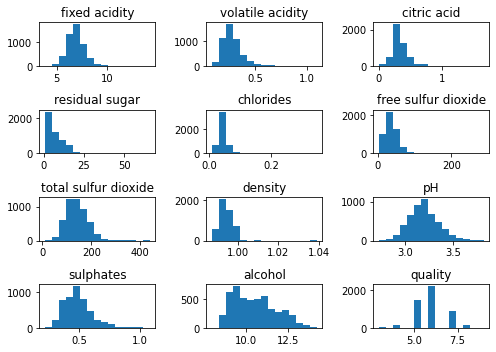

In [ ]:
df.hist(bins=15,linewidth=1,figsize=(7,5),grid=0)
plt.tight_layout()

In [ ]:
df.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

(array([  20.,  163.,    0., 1457.,    0., 2198.,  880.,    0.,  175.,
           5.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

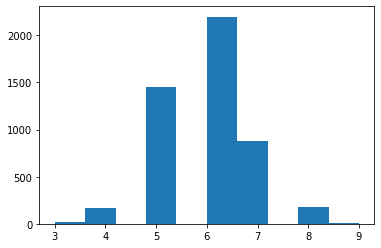

In [ ]:
plt.hist(df["quality"])

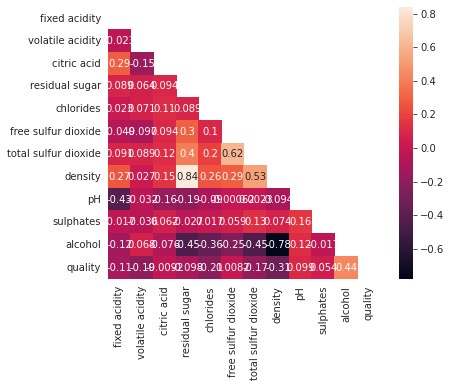

In [ ]:
corr = np.corrcoef(np.random.randn(12, 12))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  f, ax = plt.subplots(figsize=(7, 5))
  ax = sns.heatmap(df.corr(), mask=mask, square=True, annot=True)
#plt.savefig('corr.png')

In [ ]:
sns.pairplot(df)
#plt.savefig('pairplot.png')

#podział na zbior uczacy i testowy

In [ ]:
df.drop('density', inplace=True, axis=1)

In [ ]:
x = df[df.columns[:-1]]
y = df['quality']

In [ ]:
data_train, data_test = train_test_split(df, test_size=0.3, random_state=313770)

In [ ]:
x_train = data_train[data_train.columns[:-1]]
y_train = data_train['quality']
x_test = data_test[data_test.columns[:-1]]
y_test= data_test['quality']

In [ ]:
from google.colab import files
data_train.to_csv("data_train.csv")
data_test.to_csv("data_test.csv")

files.download('data_train.csv')
files.download('data_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Eksploracja zbioru uczącego

(array([  17.,  115.,    0., 1034.,    0., 1549.,  584.,    0.,  126.,
           3.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

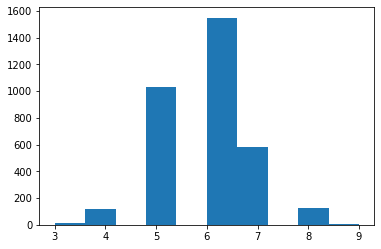

In [ ]:
plt.hist(data_train["quality"])
#data_train["quality"].hist()

In [ ]:
data_train["quality"].value_counts()

6    1549
5    1034
7     584
8     126
4     115
3      17
9       3
Name: quality, dtype: int64

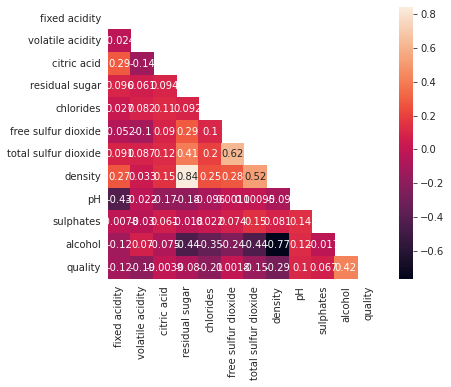

In [ ]:
corr = np.corrcoef(np.random.randn(12, 12))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
  f, ax = plt.subplots(figsize=(7, 5))
  ax = sns.heatmap(data_train.corr(), mask=mask, square=True, annot=True)
plt.savefig('corr.png')

Alkohol

Stała kwasowość - fixed acidity

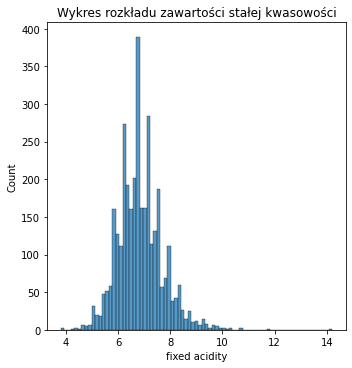

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(data_train, x='fixed acidity')
plt.tight_layout()
plt.title('Wykres rozkładu zawartości stałej kwasowości')
plt.show()

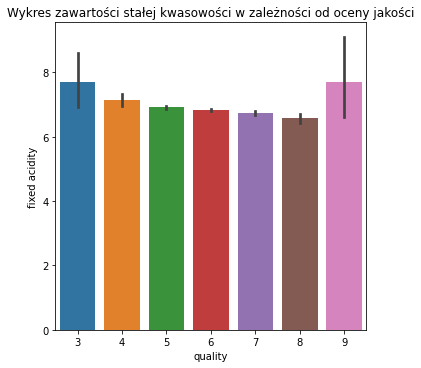

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y=data_train['fixed acidity'], data = data_train)
plt.tight_layout()
plt.title('Wykres zawartości stałej kwasowości w zależności od oceny jakości')
plt.show()

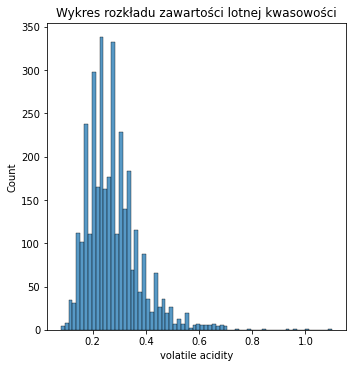

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(data_train, x='volatile acidity')
plt.tight_layout()
plt.title('Wykres rozkładu zawartości lotnej kwasowości')
plt.show()

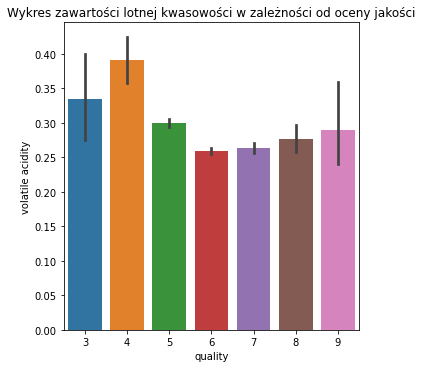

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y=data_train['volatile acidity'], data = data_train)
plt.tight_layout()
plt.title('Wykres zawartości lotnej kwasowości w zależności od oceny jakości')
plt.show()

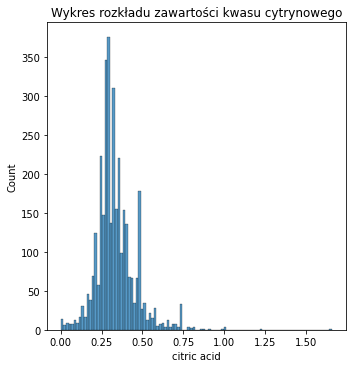

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(data_train, x='citric acid')
plt.tight_layout()
plt.title('Wykres rozkładu zawartości kwasu cytrynowego')
plt.show()

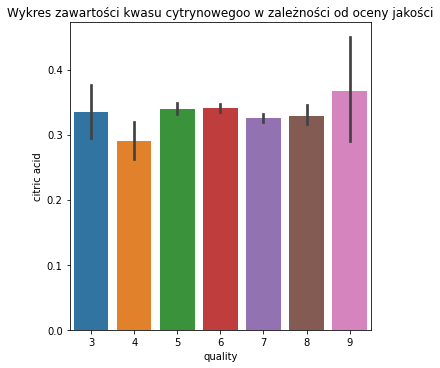

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y=data_train['citric acid'], data = data_train)
plt.tight_layout()
plt.title('Wykres zawartości kwasu cytrynowegoo w zależności od oceny jakości')
plt.show()

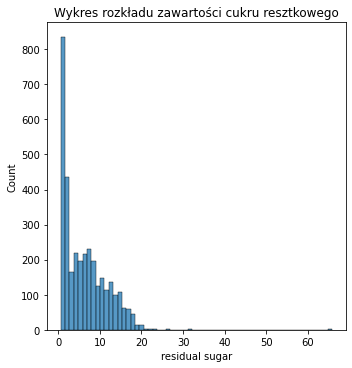

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(data_train, x='residual sugar')
plt.tight_layout()
plt.title('Wykres rozkładu zawartości cukru resztkowego')
plt.show()

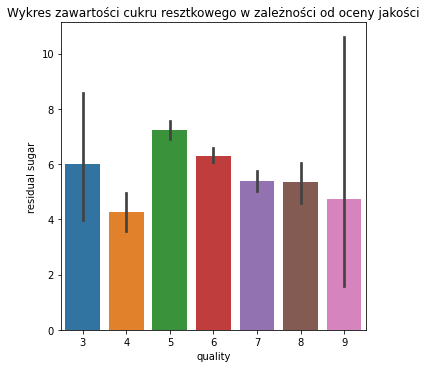

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y=data_train['residual sugar'], data = data_train)
plt.tight_layout()
plt.title('Wykres zawartości cukru resztkowego w zależności od oceny jakości')
plt.show()

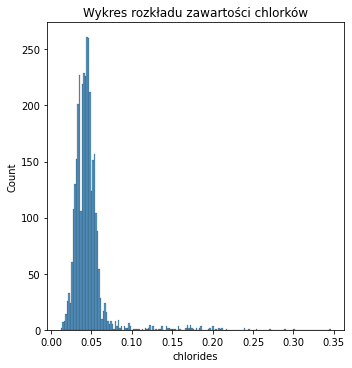

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(data_train, x='chlorides')
plt.tight_layout()
plt.title('Wykres rozkładu zawartości chlorków')
plt.show()

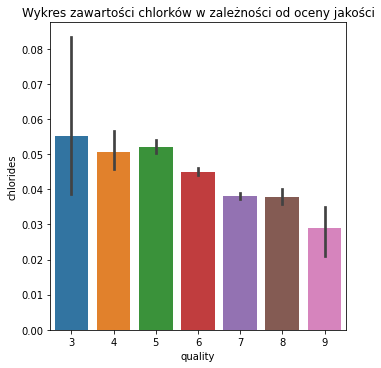

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y=data_train['chlorides'], data = data_train)
plt.tight_layout()
plt.title('Wykres zawartości chlorków w zależności od oceny jakości')
plt.show()

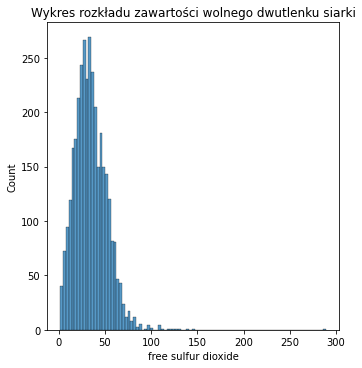

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(data_train, x='free sulfur dioxide')
plt.tight_layout()
plt.title('Wykres rozkładu zawartości wolnego dwutlenku siarki')
plt.show()

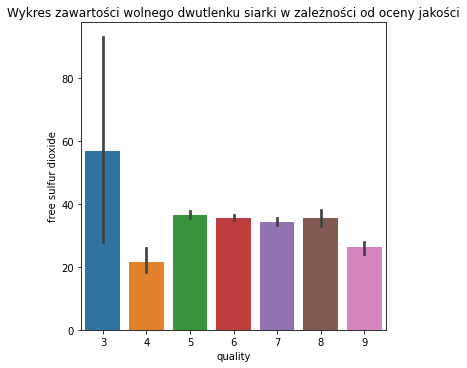

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y=data_train['free sulfur dioxide'], data = data_train)
plt.tight_layout()
plt.title('Wykres zawartości wolnego dwutlenku siarki w zależności od oceny jakości')
plt.show()

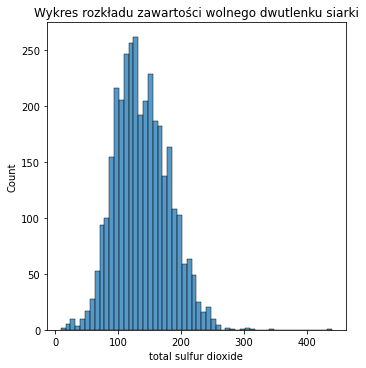

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(data_train, x='total sulfur dioxide')
plt.tight_layout()
plt.title('Wykres rozkładu zawartości wolnego dwutlenku siarki')
plt.show()

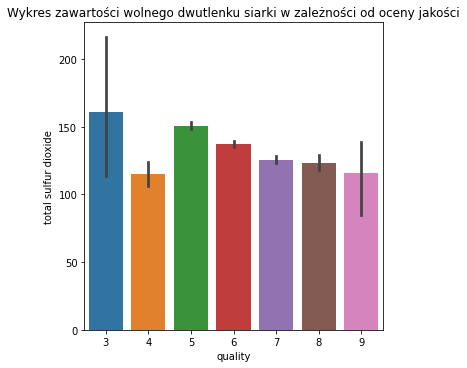

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y=data_train['total sulfur dioxide'], data = data_train)
plt.tight_layout()
plt.title('Wykres zawartości wolnego dwutlenku siarki w zależności od oceny jakości')
plt.show()

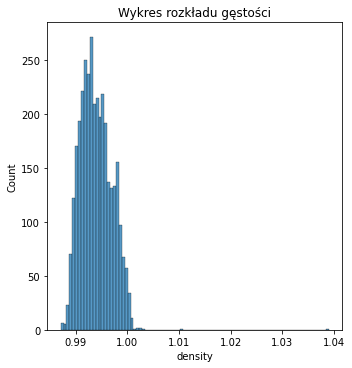

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(data_train, x='density')
plt.tight_layout()
plt.title('Wykres rozkładu gęstości')
plt.show()

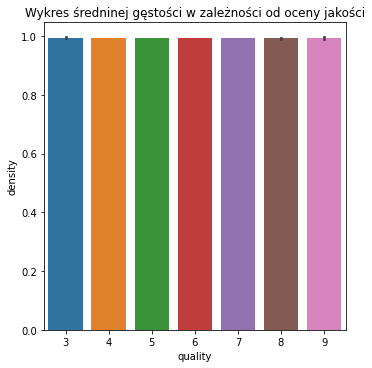

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y=data_train['density'], data = data_train)
plt.tight_layout()
plt.title('Wykres średninej gęstości w zależności od oceny jakości')
plt.show()

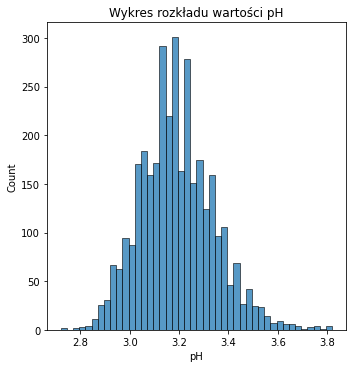

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(data_train, x='pH')
plt.tight_layout()
plt.title('Wykres rozkładu wartości pH')
plt.show()

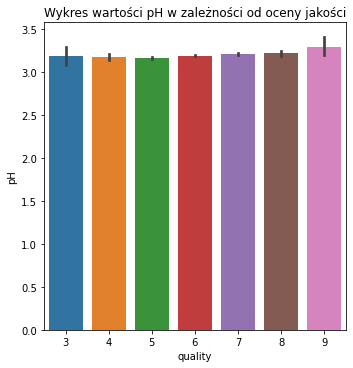

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y=data_train['pH'], data = data_train)
plt.tight_layout()
plt.title('Wykres wartości pH w zależności od oceny jakości')
plt.show()

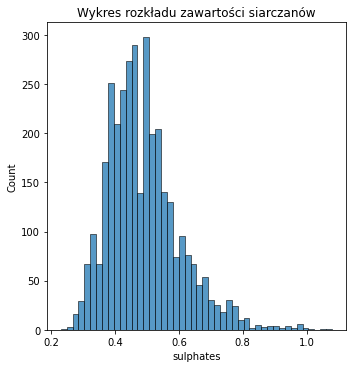

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(data_train, x='sulphates')
plt.tight_layout()
plt.title('Wykres rozkładu zawartości siarczanów')
plt.show()

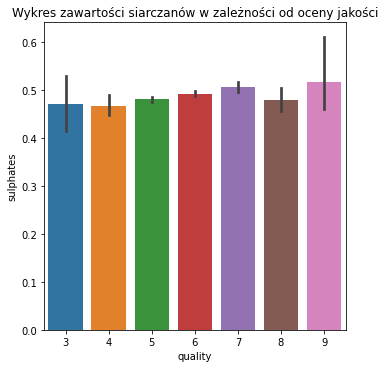

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y=data_train['sulphates'], data = data_train)
plt.tight_layout()
plt.title('Wykres zawartości siarczanów w zależności od oceny jakości')
plt.show()

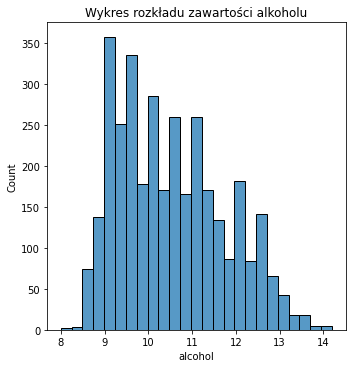

In [ ]:
plt.figure(figsize=(5, 5))
sns.histplot(data_train, x='alcohol')
plt.tight_layout()
plt.title('Wykres rozkładu zawartości alkoholu')
plt.show()

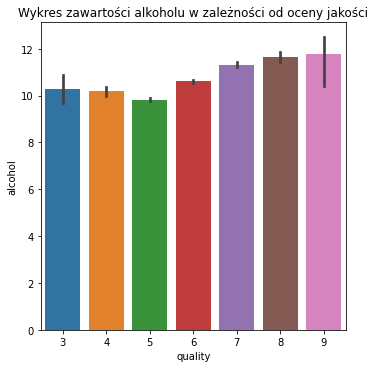

In [ ]:
plt.figure(figsize=(5, 5))
sns.barplot(x='quality', y=data_train['alcohol'], data = data_train)
plt.tight_layout()
plt.title('Wykres zawartości alkoholu w zależności od oceny jakości')
plt.show()

#klasyfikacja

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
scaler=MinMaxScaler()
scaler.fit(x)
x_norm=2*scaler.transform(x)-1
x_train_norm, x_test_norm, y_train, y_test = train_test_split(x_norm, y, random_state=313770, test_size=0.3)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='euclidean')
knn.fit(x_train_norm, y_train)
print(knn.score(x_train_norm, y_train))
print(knn.score(x_test_norm, y_test))

0.7774212368728122
0.5557823129251701


In [ ]:
# for i in range(1,50):
#   knn = KNeighborsClassifier(n_neighbors=i, weights='distance', metric='euclidean')
#   knn.fit(x_train_norm, y_train)
#   print(knn.score(x_train_norm, y_train))
#   print(knn.score(x_test_norm, y_test))
#   print('--------')

In [ ]:
y_pred_train=knn.predict(x_train_norm)

In [ ]:
from sklearn.metrics import confusion_matrix
macierz_pomyłek_train = confusion_matrix(y_train, y_pred_train)

In [ ]:
macierz_pomyłek_train

array([[   9,    0,    4,    4,    0,    0,    0],
       [   2,   78,   24,   10,    1,    0,    0],
       [   2,   21,  839,  159,   13,    0,    0],
       [   2,   20,  174, 1269,   77,    7,    0],
       [   0,    5,   47,  114,  411,    7,    0],
       [   0,    2,   10,   34,   21,   59,    0],
       [   0,    0,    1,    1,    1,    0,    0]])

In [ ]:
print('Trafnosc na zbiorze uczącym',round(knn.score(x_train_norm,y_train),3))

Trafnosc na zbiorze uczącym 0.777


In [ ]:
y_pred_test=knn.predict(x_test_norm)
macierz_pomyłek_test = confusion_matrix(y_test, y_pred_test)
#Wyliczamy trafnosc na zbiorze testowym
print('Trafnosc na zbiorze testowym',round(knn.score(x_test_norm,y_test),3))

Trafnosc na zbiorze testowym 0.556


In [ ]:
roznica = y_test - y_pred_test
a = 0
for i in roznica:
    if i == 0:
        #count += 1
        a += 1
    elif i == 1 or i == -1:
        a += 1

In [ ]:
a/len(roznica)

0.9115646258503401

In [ ]:
roznica = y_train - y_pred_train
a = 0
for i in roznica:
    if i == 0:
        #count += 1
        a += 1
    elif i == 1 or i == -1:
        a += 1

In [ ]:
a/len(roznica)

0.9521586931155193

In [ ]:
print('MAE na zbiorze uczącym',round(mean_absolute_error(y_train,y_pred_train),3))
print('MAE na zbiorze testowym',round(mean_absolute_error(y_test, y_pred_test),3))

MAE na zbiorze uczącym 0.279
MAE na zbiorze testowym 0.549


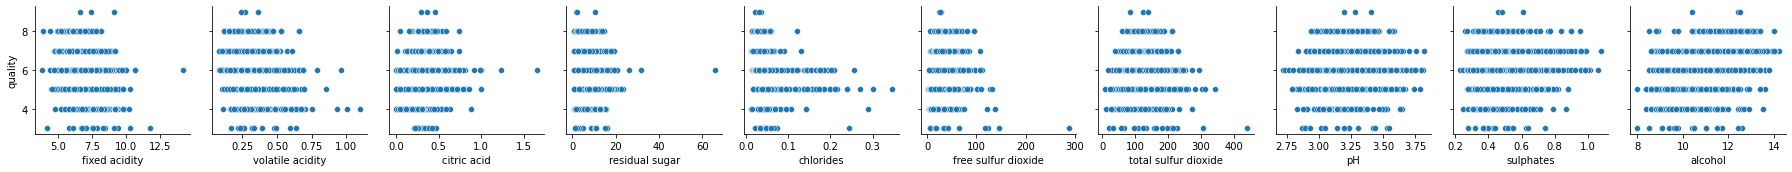

In [ ]:
#Macierz wykresów rozrzutów
import matplotlib.pyplot as plt
import seaborn as sns
names = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','pH','sulphates','alcohol']
sns.pairplot(data_train,x_vars=names,y_vars=["quality"])
plt.tight_layout()
plt.show()

#Grupowanie

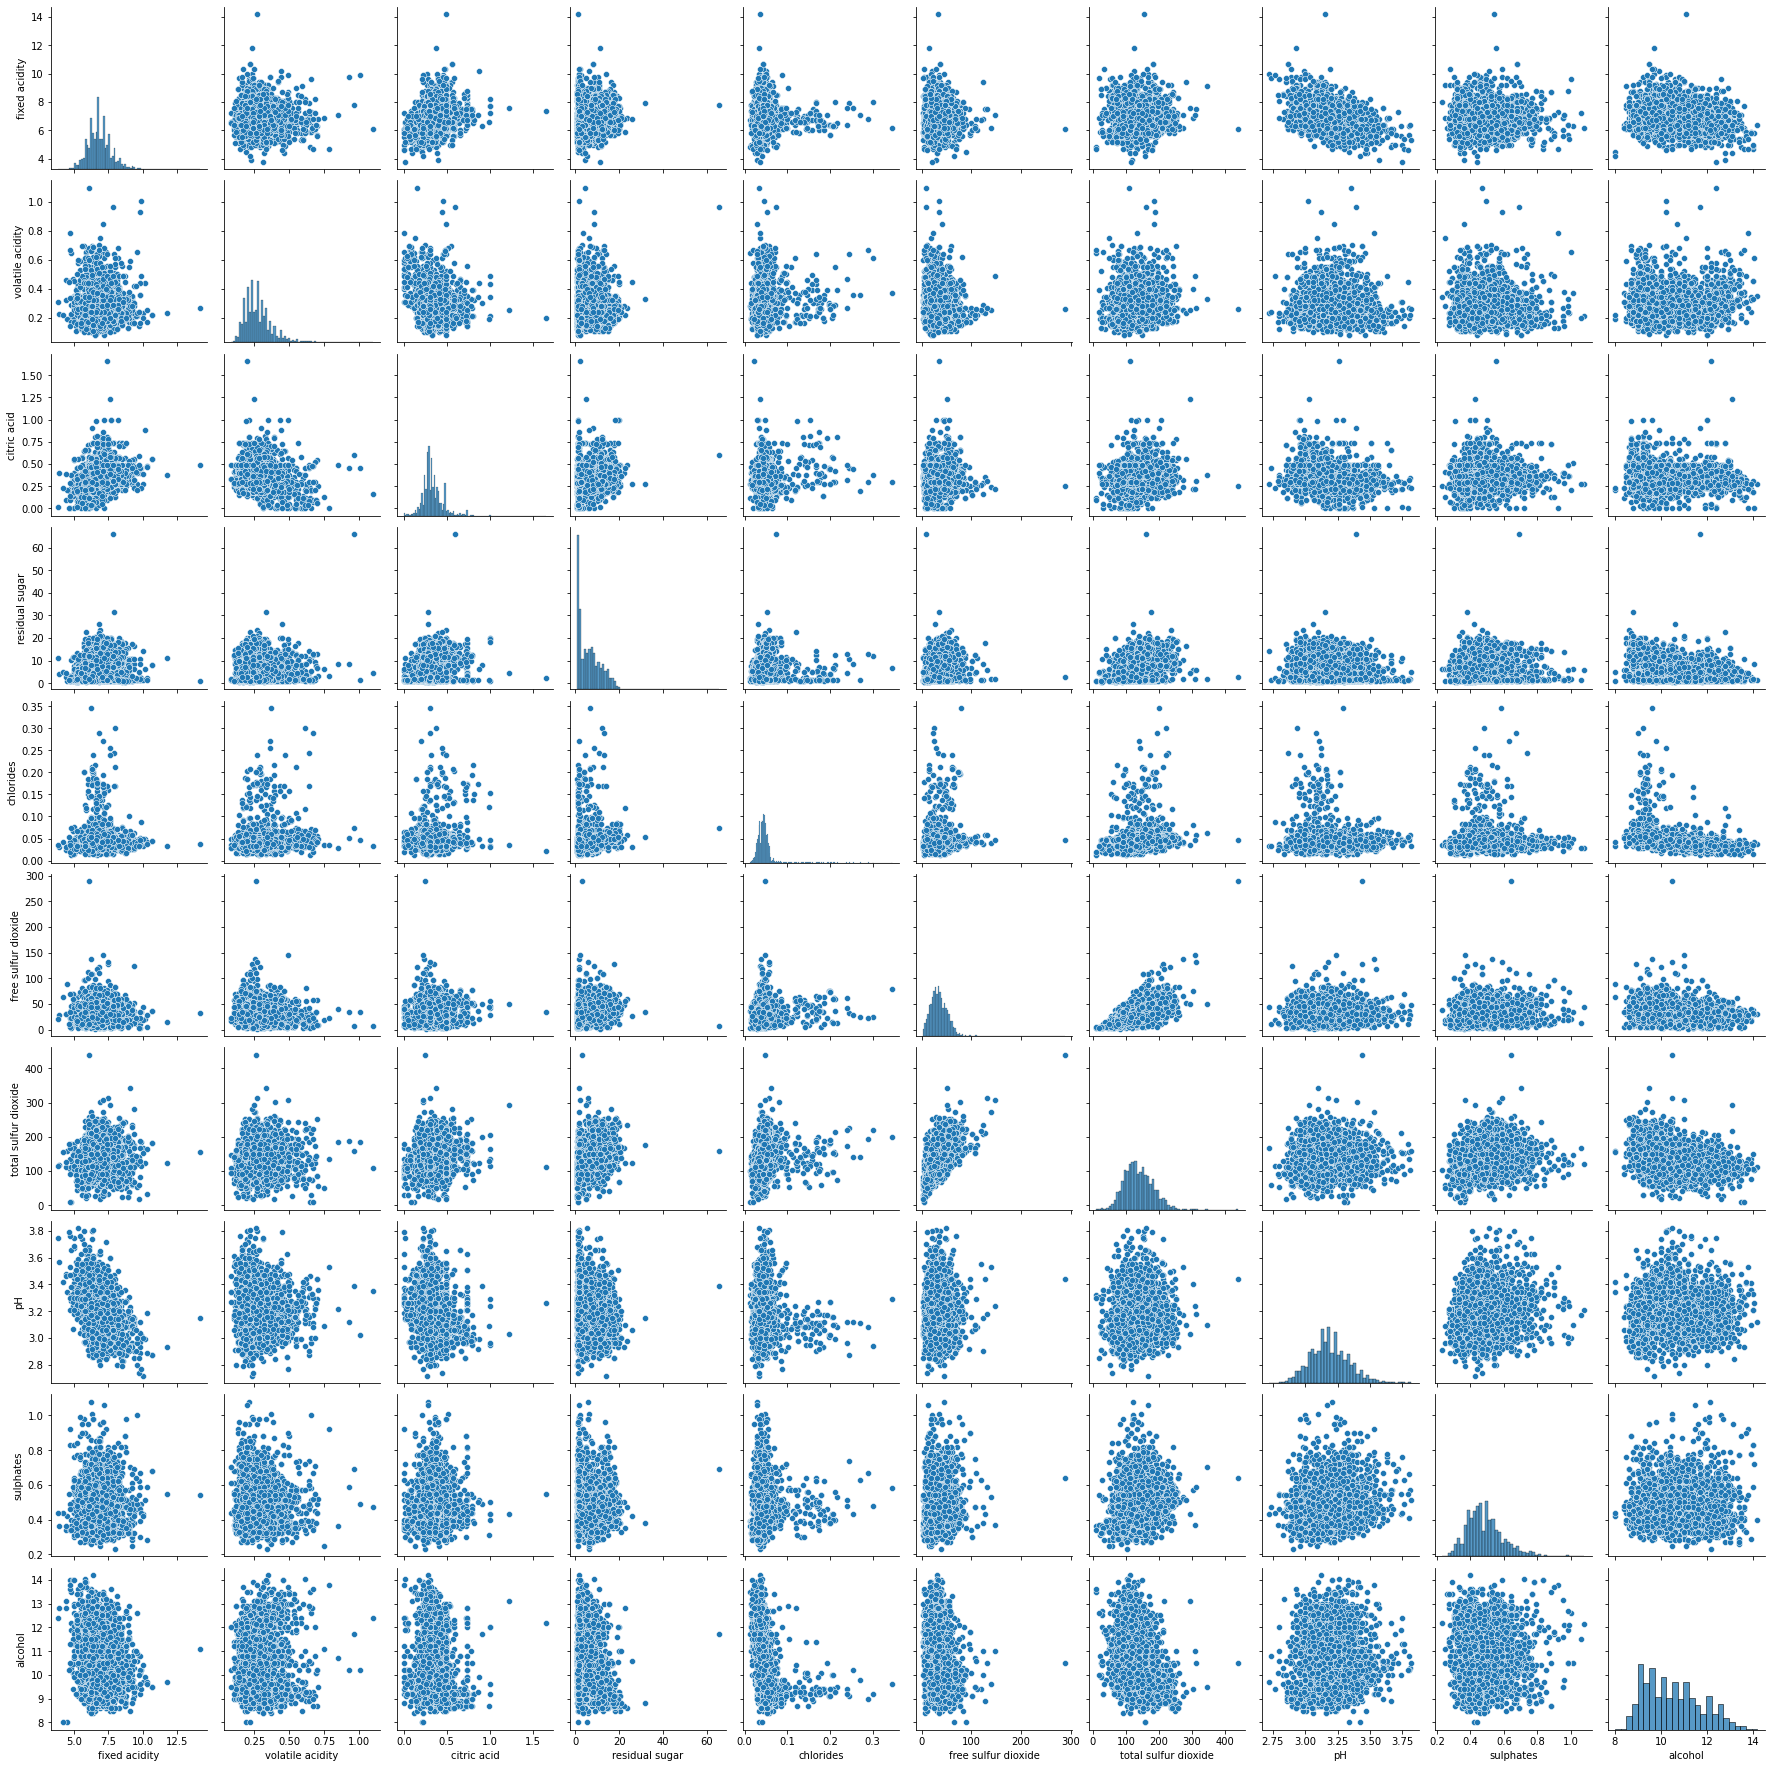

In [ ]:
sns.pairplot(x_train)
plt.savefig('pairplot.png')

In [ ]:
predyktory = x_train.apply(stats.zscore)
predyktory_test = x_test.apply(stats.zscore)

In [ ]:
for i in range(2,9):
  k_means = KMeans(n_clusters = i, init='random', random_state=313770)
  k_means.fit(predyktory)
  miara_sylwetki=silhouette_score(predyktory,k_means.labels_, metric='euclidean')
  print(f'Silhouette Score(n={i}):',miara_sylwetki)

Silhouette Score(n=2): 0.1853533910244683
Silhouette Score(n=3): 0.13238674127373382
Silhouette Score(n=4): 0.149070550571199
Silhouette Score(n=5): 0.13758632583111238
Silhouette Score(n=6): 0.13849657711665497
Silhouette Score(n=7): 0.12260384399397664
Silhouette Score(n=8): 0.12419828763023569


In [ ]:
clusters = []
inertia_vals = []
for k in range(1, 10):

    model = KMeans(n_clusters=k, random_state=313770)
    model.fit(predyktory)

    clusters.append(model)
    inertia_vals.append(model.inertia_)

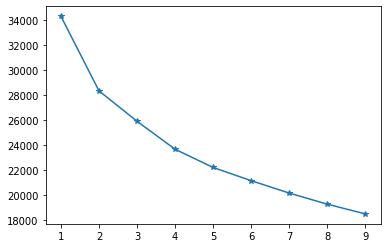

In [ ]:
# plot the inertia vs K values
plt.plot(range(1,10,1),inertia_vals,marker='*')
plt.show()

In [ ]:
km = KMeans(n_clusters=2,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
kmeans=km.fit(predyktory)
cluster=kmeans.labels_  #Który rekord trafił do którego klastra
Cluster0=predyktory.loc[cluster==0]  #Rekordy z klastra 0
Cluster1=predyktory.loc[cluster==1]  #Rekordy z klastra 1
#Cluster2=x_train.loc[cluster==2]  #Rekordy z klastra 2
opis1=Cluster0.describe()
opis2=Cluster1.describe()
#opis3=Cluster2.describe()



In [ ]:
grupa1 = pd.merge(Cluster0, y_train, left_index=True, right_index=True)

In [ ]:
grupa2 = pd.merge(Cluster1, y_train, left_index=True, right_index=True)

In [ ]:
grupa1.to_csv("grupa1_train.csv")
grupa2.to_csv("grupa2_train.csv")

In [ ]:
opis1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000
mean,0.178755,0.047481,0.243295,0.786525,0.391547,0.649474,0.815461,-0.222962,0.097448,-0.747192
std,0.923392,0.954353,1.137440,0.973720,1.338556,1.013332,0.800142,0.904102,0.933093,0.584577
min,-3.092590,-1.710396,-2.086977,-1.087846,-1.150121,-1.675259,-1.500635,-3.127867,-1.932398,-2.065820
25%,-0.408293,-0.571490,-0.535117,0.194613,-0.125411,-0.017551,0.301748,-0.793345,-0.523655,-1.162782
50%,0.058542,-0.150590,0.036621,0.802613,0.088070,0.611235,0.769899,-0.259739,0.004623,-0.916499
75%,0.642084,0.418863,0.853390,1.452458,0.386944,1.125696,1.308273,0.273866,0.532902,-0.423933
max,8.578267,7.202783,7.305860,11.712135,12.811555,14.501686,7.066534,3.675598,4.583038,2.120992


In [ ]:
opis2

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
count,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000,2046.000000
mean,-0.120742,-0.032072,-0.164337,-0.531270,-0.264476,-0.438697,-0.550815,0.150603,-0.065823,0.504702
std,1.031651,1.028917,0.857654,0.579274,0.541045,0.710803,0.700715,1.033442,1.038060,0.901870
min,-3.559424,-1.957984,-2.740391,-1.127231,-1.448995,-1.903908,-3.022126,-2.994466,-2.284584,-1.737443
25%,-0.875127,-0.769560,-0.535117,-0.969693,-0.595070,-0.932148,-1.009076,-0.526542,-0.787795,-0.177650
50%,-0.174876,-0.175349,-0.208409,-0.812154,-0.338892,-0.474849,-0.564332,0.073764,-0.259516,0.479105
75%,0.408667,0.418863,0.199975,-0.223847,0.002678,0.039612,-0.119588,0.807471,0.444855,1.217954
max,4.026633,8.143618,10.817963,2.653687,5.681280,2.840567,1.858351,4.209203,5.199363,3.024030


In [ ]:
km = KMeans(n_clusters=2,init='random',n_init=10,max_iter=300,tol=1e-04,random_state=0)
kmeans=km.fit(predyktory_test)
cluster=kmeans.labels_  #Który rekord trafił do którego klastra
Cluster0_test=predyktory_test.loc[cluster==0]  #Rekordy z klastra 0
Cluster1_test=predyktory_test.loc[cluster==1]  #Rekordy z klastra 1
#Cluster2=x_train.loc[cluster==2]  #Rekordy z klastra 2
opis1_test=Cluster0_test.describe()
opis2_test=Cluster1_test.describe()
#opis3=Cluster2.describe()

In [ ]:
opis1_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates,alcohol
count,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000,853.000000
mean,-0.102349,-0.000699,-0.158065,-0.553577,-0.293815,-0.477978,-0.542421,0.147936,-0.023876,0.557587
std,1.060634,1.038971,0.861692,0.586392,0.702073,0.754601,0.729037,1.041953,1.062338,0.884621
min,-3.281990,-1.988354,-2.816542,-1.157428,-2.064320,-2.044020,-2.882964,-2.585661,-2.346817,-1.357785
25%,-0.820184,-0.692618,-0.604834,-0.999096,-0.702772,-1.031833,-0.999883,-0.565073,-0.786401,-0.086822
50%,-0.204732,-0.094587,-0.179506,-0.830868,-0.419116,-0.525739,-0.570827,0.086730,-0.179572,0.469224
75%,0.533810,0.503445,0.245822,-0.227226,0.034733,-0.019646,-0.117934,0.803712,0.600637,1.343011
max,3.611069,6.234583,3.478318,1.712345,6.502087,3.649533,2.635178,3.802004,4.068230,2.772845


In [ ]:
opis2_test

In [ ]:
grupa1 = pd.merge(Cluster0_test, y_test, left_index=True, right_index=True)
grupa2 = pd.merge(Cluster1_test, y_test, left_index=True, right_index=True)

In [ ]:
grupa1.to_csv("grupa1_test.csv")
grupa2.to_csv("grupa2_test.csv")

(array([  2.,   0.,  22.,   0., 249.,   0., 284.,   0.,  50.,  10.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

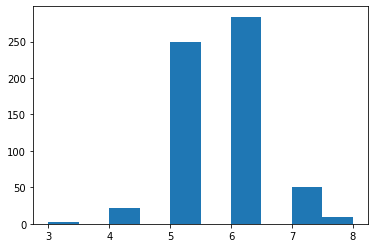

In [ ]:
plt.hist(grupa2["quality"])

(array([  1.,  26.,   0., 174.,   0., 365., 246.,   0.,  39.,   2.]),
 array([3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6, 7.2, 7.8, 8.4, 9. ]),
 <a list of 10 Patch objects>)

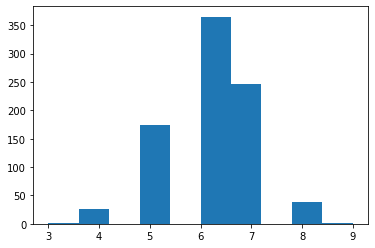

In [ ]:
plt.hist(grupa1["quality"])

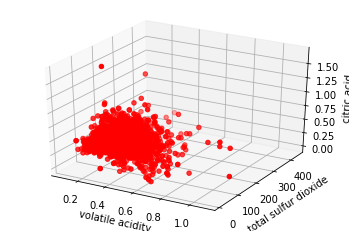

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=np.array(x_train['volatile acidity'])
y=np.array(x_train['total sulfur dioxide'])
z=np.array(x_train['citric acid'])
ax.set_xlabel('volatile acidity')
ax.set_ylabel('total sulfur dioxide')
ax.set_zlabel('citric acid')
ax.scatter(x, y, z, c='r', marker='o')
plt.show()

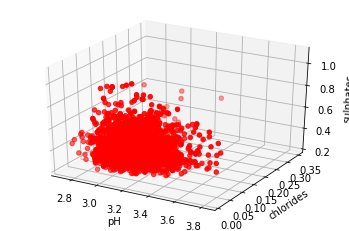

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=np.array(x_train['pH'])
y=np.array(x_train['chlorides'])
z=np.array(x_train['sulphates'])
ax.set_xlabel('pH')
ax.set_ylabel('chlorides')
ax.set_zlabel('sulphates')
ax.scatter(x, y, z, c='r', marker='o')
plt.show()

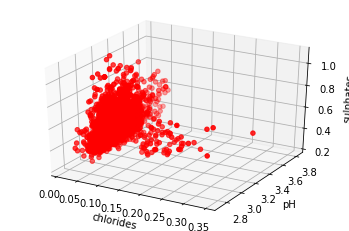

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=np.array(x_train['chlorides'])
y=np.array(x_train['pH'])
z=np.array(x_train['sulphates'])
ax.set_xlabel('chlorides')
ax.set_ylabel('pH')
ax.set_zlabel('sulphates')
ax.scatter(x, y, z, c='r', marker='o')
plt.show()

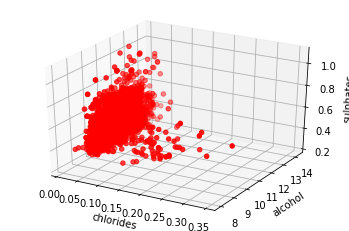

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x=np.array(x_train['chlorides'])
y=np.array(x_train['alcohol'])
z=np.array(x_train['sulphates'])
ax.set_xlabel('chlorides')
ax.set_ylabel('alcohol')
ax.set_zlabel('sulphates')
ax.scatter(x, y, z, c='r', marker='o')
plt.show()

#MLP Regresja

In [ ]:
scaler=MinMaxScaler()
scaler.fit(data_train)

data_norm=scaler.transform(data_train)
data_test_norm=scaler.transform(data_test)

In [ ]:
names = ['fixed acidity', 'volatile acidity', 'citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','pH','sulphates','alcohol', 'quality']


In [ ]:
data_norm = pd.DataFrame(data_norm, columns=names)

In [ ]:
data_test_norm = pd.DataFrame(data_test_norm, columns=names)

In [ ]:
x2 = data_norm[data_norm.columns[:-1]]
y2 = data_norm['quality']

In [ ]:
x_norm_test2 = data_test_norm[data_test_norm.columns[:-1]]
y_norm_test2 = data_test_norm['quality']

In [ ]:

siec = MLPRegressor(hidden_layer_sizes=(80,), activation='relu',solver='lbfgs', alpha=0.0001, max_iter = 10000, random_state=313770)
siec.fit(x2,y2)
print(siec.score(x2, y2))
print(siec.score(x_norm_test2, y_norm_test2))
#print(i)
print("-----------------")

0.47276339120729627
0.3799369633761782
-----------------


In [ ]:
y_predicted2_train=siec.predict(x2)

In [ ]:
y_predicted2_test=siec.predict(x_norm_test2)

denormalizacja

In [ ]:
y_predicted_denor = np.zeros(y_predicted2_test.shape[0])
i = 0
while i <= (y_predicted2_test.shape[0] - 1):
    y_predicted_denor[i] = (y_predicted2_test[i] * (max(y_test) - min(y_test))) + min(y_test)
    i += 1

In [ ]:
with open(r'y_pred_szacowanie_train.txt', 'w') as fp:
    fp.write("\n".join(str(item) for item in y_predicted_denor_train))

In [ ]:
y_predicted_denor_train = np.zeros(y_predicted2_train.shape[0])
i = 0
while i <= (y_predicted2_train.shape[0] - 1):
    y_predicted_denor_train[i] = (y_predicted2_train[i] * (max(y_train) - min(y_train))) + min(y_train)
    i += 1

In [ ]:
y_predicted_denor_train

array([7.0150411 , 7.00953871, 4.96329379, ..., 3.95880686, 3.96700883,
       4.96933486])

In [ ]:
y_pred_train = []
for i in y_predicted_denor_train:
    y_pred_train.append(round(i,0))

In [ ]:
with open(r'y_pred_szacowanie_test_rounded.txt', 'w') as fp:
    fp.write("\n".join(str(item) for item in y_pred_test))

In [ ]:
roznica = y_train - y_pred_train
count = 0
a = 0
for i in roznica:
    if i == 0:
      count +=1
      a += 1
    elif i == 1 or i == -1:
        a += 1

In [ ]:
a/len(roznica)

0.9746207701283547

In [ ]:
y_pred_test = []
for i in y_predicted_denor:
    y_pred_test.append(round(i,0))

In [ ]:
roznica = y_test - y_pred_test
a = 0
for i in roznica:
    if i == 0:
        a += 1
    elif i == 1 or i == -1:
        a += 1

In [ ]:
a/len(roznica)

0.9598639455782313

In [ ]:
print('MAE na zbiorze uczącym',round(mean_absolute_error(y_train,y_pred_train),3))
print('MAE na zbiorze testowym',round(mean_absolute_error(y_test, y_pred_test),3))

MAE na zbiorze uczącym 0.43
MAE na zbiorze testowym 0.48
